In [2]:
import mne

In [22]:
p = "/scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-filt_raw.fif"


raw = mne.io.read_raw_fif(p)

Opening raw data file /scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-filt_raw.fif...
    Range : 0 ... 1360483 =      0.000 ...  5441.932 secs
Ready.


In [23]:
p = "/scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-icafit_epo.fif"


epoch = mne.read_epochs(p)

Reading /scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-icafit_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 66)  idle
    Found the data of interest:
        t =       0.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
5440 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [27]:
p = "/scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-ica_ica.fif"


raw = mne.preprocessing.read_ica(p)

Reading /scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-ica_ica.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 66)  idle
Now restoring ICA solution ...
Ready.


Using matplotlib as 2D backend.


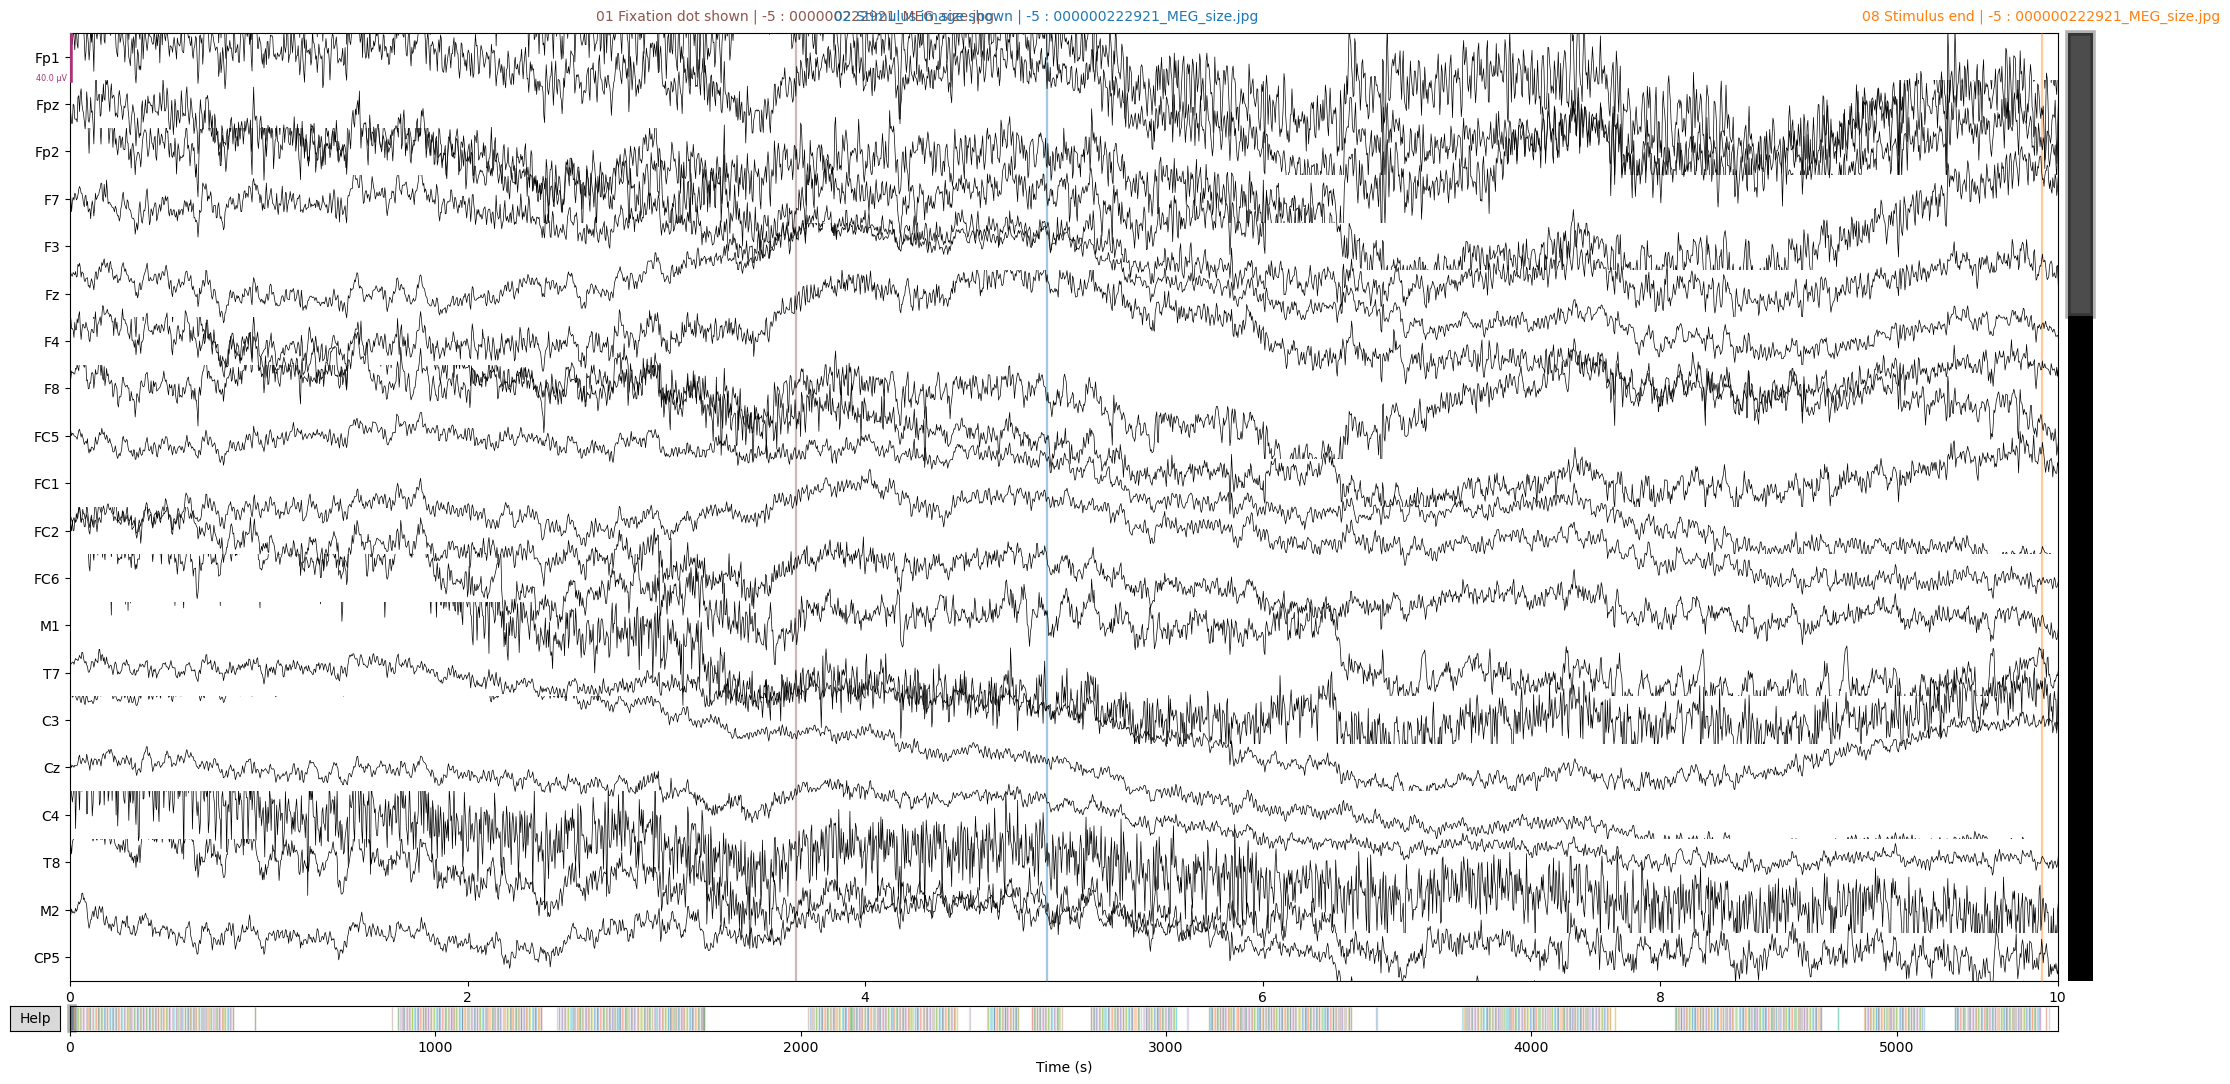

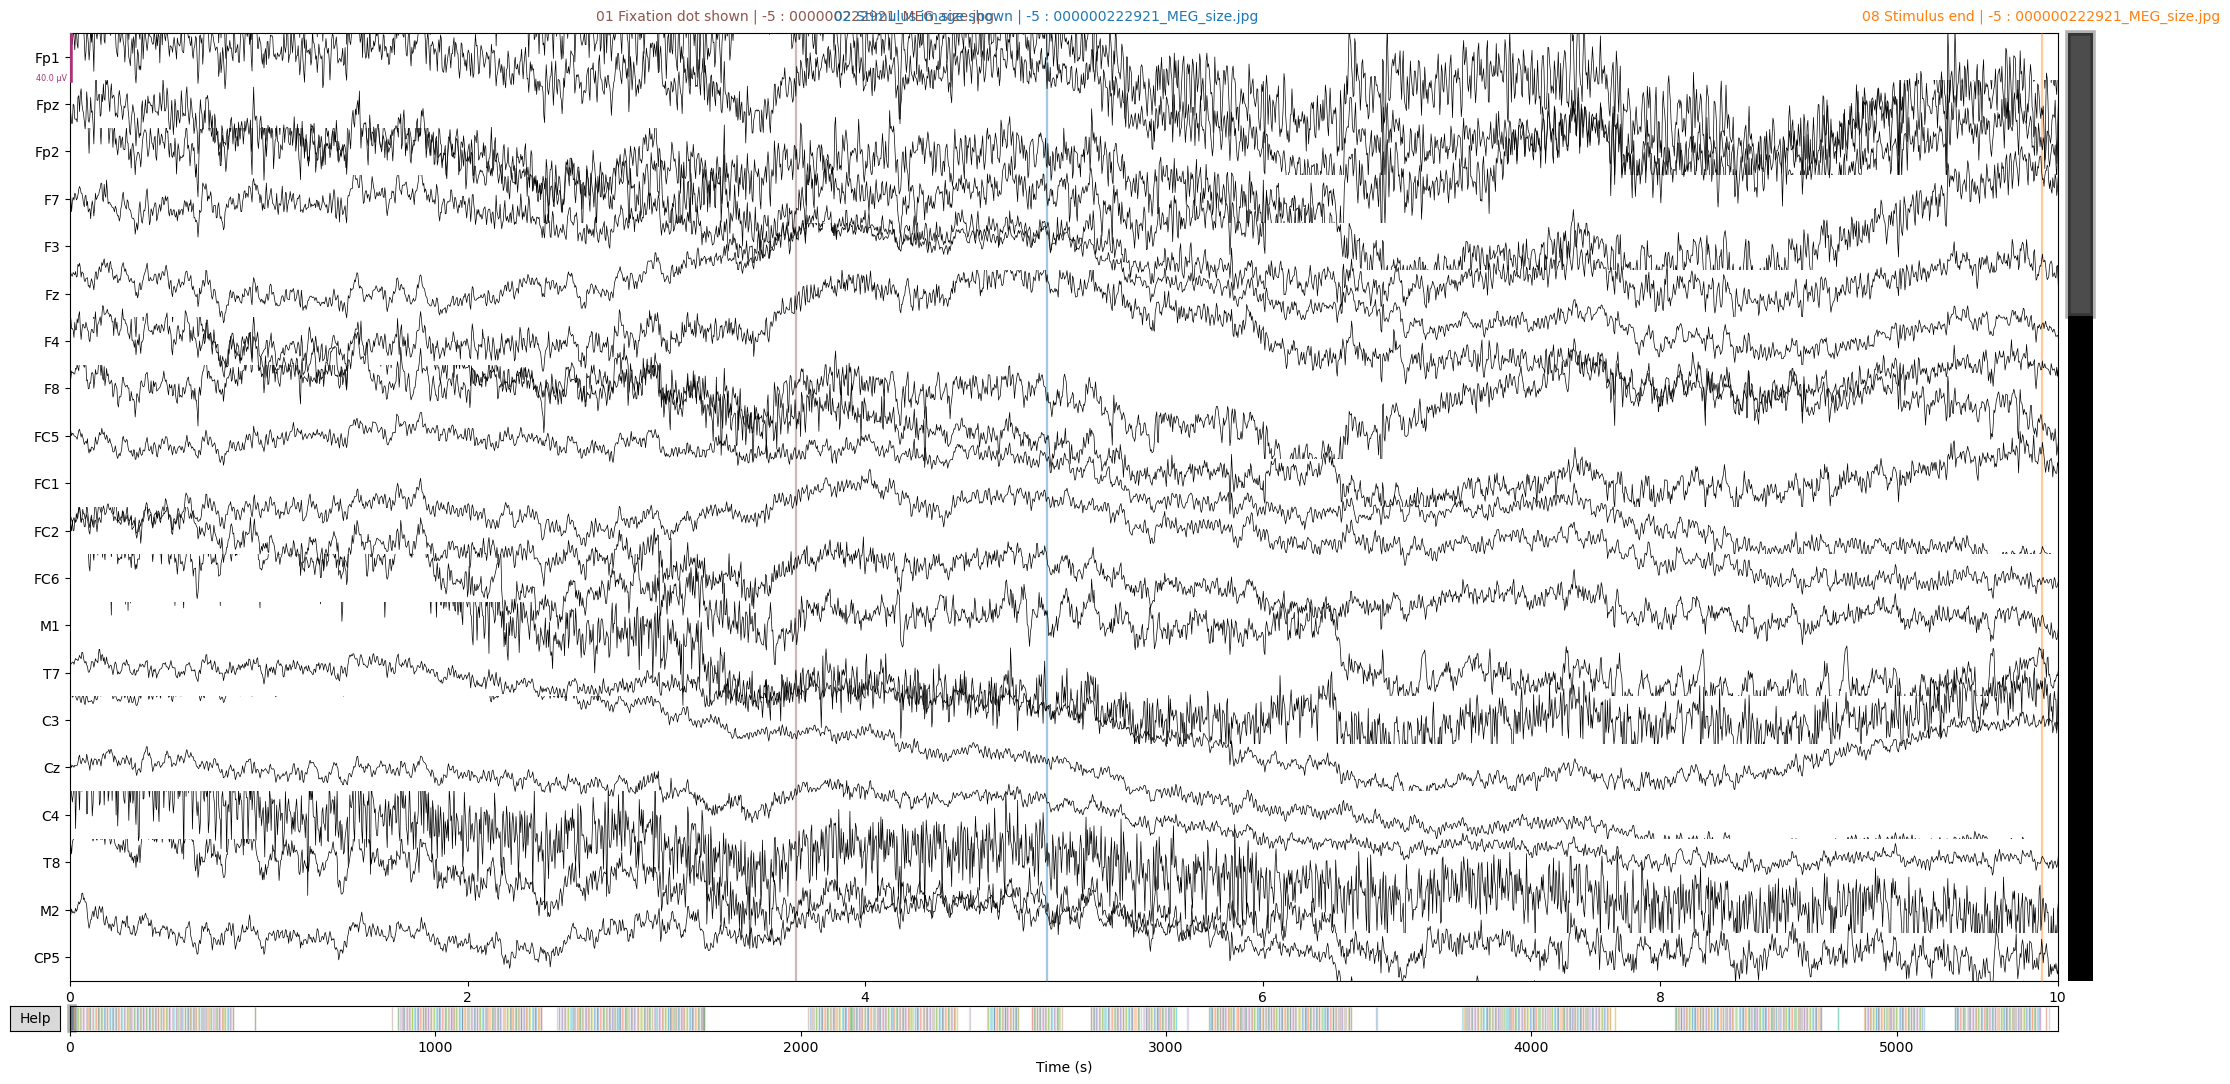

In [13]:
raw.plot()

In [4]:
p = "/scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-syncET_raw.fif"
et = mne.io.read_raw_fif(p,preload=True)
et

Opening raw data file /scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-syncET_raw.fif...
    Range : 481 ... 1360483 =      1.924 ...  5441.932 secs
Ready.
Reading 0 ... 1360002  =      0.000 ...  5440.008 secs...


<Raw | sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-syncET_raw.fif, 70 x 1360003 (5440.0 s), ~726.4 MB, data loaded>

In [5]:
%matplotlib inline

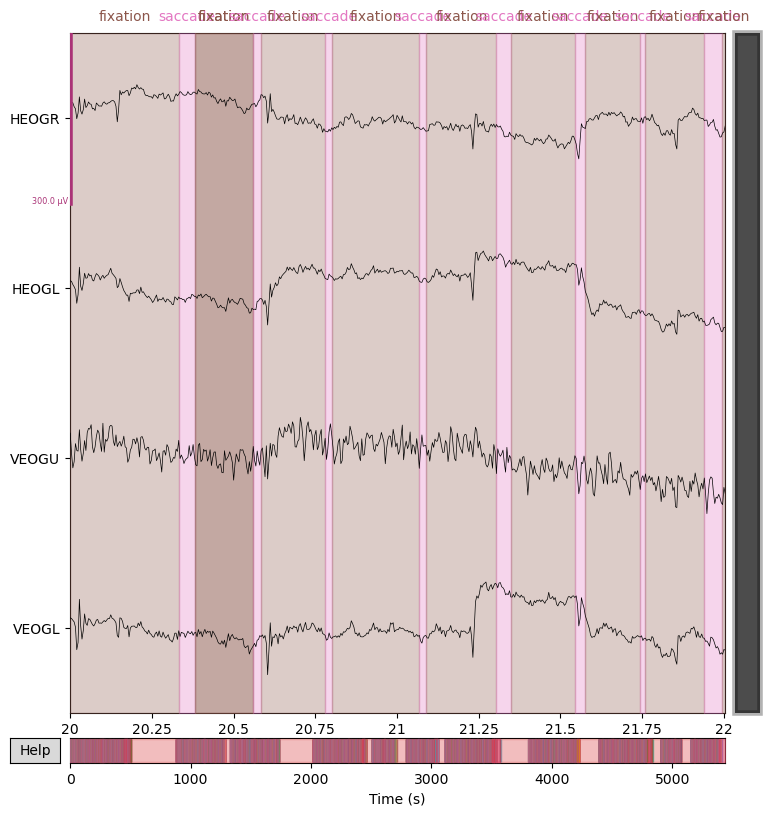

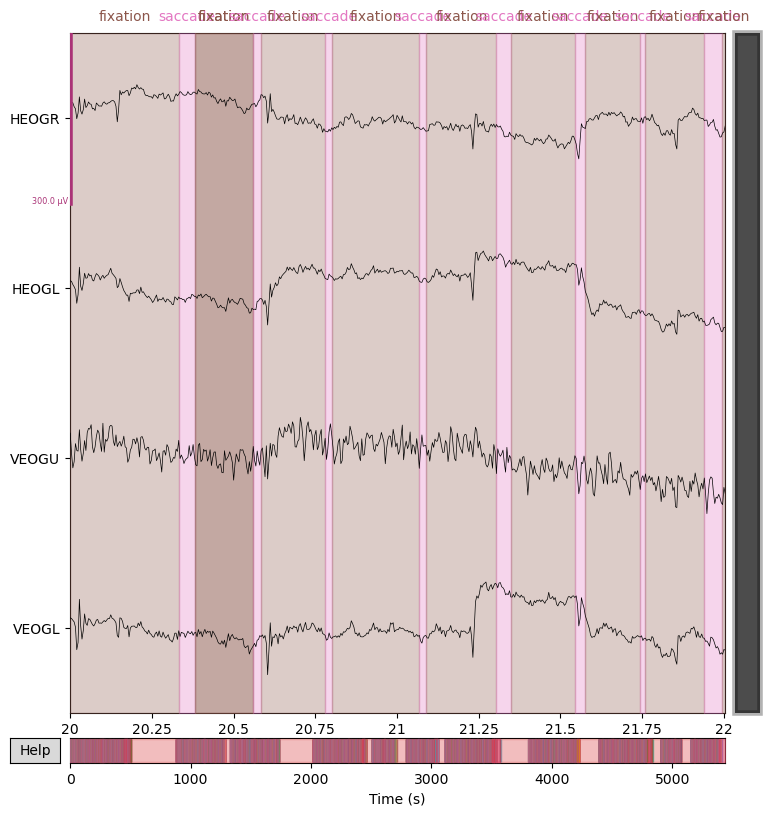

In [9]:
et.plot(duration=2,start=20,picks="eog")

In [218]:
et.annotations.rename({"BAD_blink":"blink"})

<Annotations | 23870 segments, channel-specific: 01 Fixation dot shown | ...>

In [49]:
from matplotlib import pyplot as plt

In [ ]:
mne.io.read_raw_eyelink

In [219]:
evt = mne.events_from_annotations(et,regexp="blink")
epochs = mne.Epochs(et,evt[0],event_id=evt[1],tmin=-0.1,tmax=0.5,event_repeated="merge",baseline=None)
#evt

Used Annotations descriptions: ['blink']


Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1128 matching events found
No baseline correction applied
0 projection items activated


Using data from preloaded Raw for 1128 events and 151 original time points ...
3 bad epochs dropped
Not setting metadata
1125 matching events found
No baseline correction applied
0 projection items activated


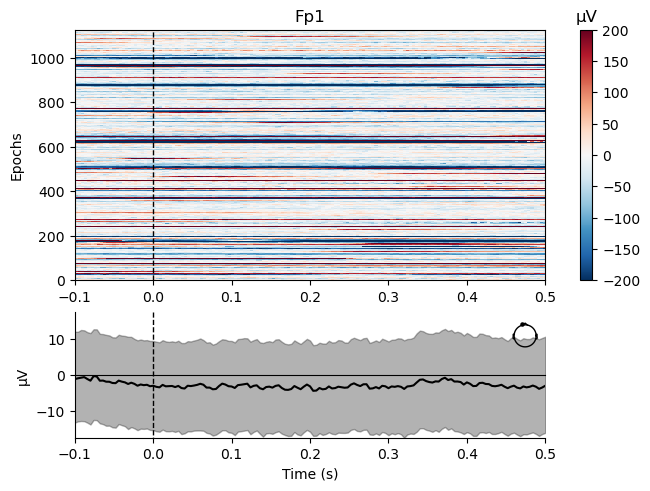

[<Figure size 640x480 with 4 Axes>]

In [221]:
epochs.copy().plot_image(picks="Fp1",vmin=-200,vmax=200)

In [3]:
raw_et = mne.io.read_raw_eyelink("/scratch/data/2024FreeViewingMSCOCO_pilot/sub-001/ses-001/beh/sub-001_ses-001_task-2024FreeViewingMSCOCO_et.asc")


Loading /scratch/data/2024FreeViewingMSCOCO_pilot/sub-001/ses-001/beh/sub-001_ses-001_task-2024FreeViewingMSCOCO_et.asc
Pixel coordinate data detected.Pass `scalings=dict(eyegaze=1e3)` when using plot method to make traces more legible.
Pupil-size area detected.
There are 12 recording blocks in this file. Times between blocks will be annotated with BAD_ACQ_SKIP.


In [12]:
raw_et._raw_extras[0]["dfs"]["fixations"]

eye      time  end_time  duration  fix_avg_x  fix_avg_y  \
0       L     0.007     0.080     0.074      617.0      585.8   
1       R     0.007     0.082     0.076      775.2      432.8   
2       L     0.116     0.453     0.338      814.9      584.8   
3       R     0.120     0.453     0.334      827.4      583.5   
4       R     0.478     0.660     0.183      950.3      588.9   
...    ..       ...       ...       ...        ...        ...   
17970   L  5392.229  5392.590     0.362     1030.1      542.0   
17971   L  5392.633  5392.909     0.277      789.1      540.6   
17972   R  5392.633  5392.924     0.292      791.2      532.0   
17973   R  5393.097  5393.554     0.458      909.5      533.3   
17974   L  5393.128  5393.546     0.419      919.0      564.3   

       fix_avg_pupil_size  
0                   751.0  
1                   306.0  
2                   768.0  
3                   501.0  
4                   548.0  
...                   ...  
17970               837.0  
17971               936.0  
17972               842.0  
17973               757.0  
17974               872.0  

[17975 rows x 7 columns]

In [13]:
raw_et._raw_extras[0].keys()

dict_keys(['event_lines', 'rec_info', 'tracking_mode', 'eye', 'first_samp', 'sfreq', 'pupil_info', 'n_blocks', 'dt', 'dfs', 'orig_nchan'])

In [ ]:
raw_et.plot(duration=1,precompute=False,)